In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('/Users/aamirpirani/Desktop/Data_Analysis/Dissertation/Data/Dissertation_Survey_Data.csv')

## Data Exploration 

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             618 non-null    int64 
 1   Country                        618 non-null    object
 2   Age                            550 non-null    object
 3   Technology Access              618 non-null    object
 4   Technology Reliability         618 non-null    object
 5   Use of Technology              618 non-null    object
 6   Technology Used Type           618 non-null    object
 7   Technology Adoption            618 non-null    object
 8   Impacting Technology Adoption  618 non-null    object
 9   Technology Familiar With       618 non-null    object
 10  Technology Benefit             618 non-null    object
dtypes: int64(1), object(10)
memory usage: 53.2+ KB
None


In [4]:
print(df['Age'].unique())

['18-24' '25-34' '35-44' nan '45-54' 'Under 18']


In [5]:
mode_age = df['Age'].mode()[0]
df['Age'].fillna(mode_age, inplace=True)

In [6]:
print(df['Age'].unique())

['18-24' '25-34' '35-44' '45-54' 'Under 18']


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             618 non-null    int64 
 1   Country                        618 non-null    object
 2   Age                            618 non-null    object
 3   Technology Access              618 non-null    object
 4   Technology Reliability         618 non-null    object
 5   Use of Technology              618 non-null    object
 6   Technology Used Type           618 non-null    object
 7   Technology Adoption            618 non-null    object
 8   Impacting Technology Adoption  618 non-null    object
 9   Technology Familiar With       618 non-null    object
 10  Technology Benefit             618 non-null    object
dtypes: int64(1), object(10)
memory usage: 53.2+ KB
None


In [8]:
print(df.head())

   id   Country    Age Technology Access Technology Reliability  \
0   1  Tanzania  18-24                No          Very Reliable   
1   2  Tanzania  25-34               Yes          Very Reliable   
2   3     Kenya  25-34               Yes          Very Reliable   
3   4     Kenya  25-34                No    Somewhat Unreliable   
4   5     Kenya  35-44               Yes          Very Reliable   

  Use of Technology                    Technology Used Type  \
0        Frequently                   Educational Platforms   
1         Regularly           Health & Fitness Applications   
2         Regularly  Online Banking or Finance Applications   
3            Always                      Email Applications   
4        Frequently                      Email Applications   

  Technology Adoption Impacting Technology Adoption  Technology Familiar With  \
0                High             Lack of awareness     Agricultural Robotics   
1                 Low                 Affordability     

## Country Distribution 

In [9]:
country_distribution = df['Country'].value_counts()
print("Country Distribution:\n", country_distribution)

Country Distribution:
 Country
Kenya       204
Tanzania    164
Uganda      120
Ethiopia     59
DR Congo     41
Somalia      15
Burundi      15
Name: count, dtype: int64


In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [11]:
world = gpd.read_file('/Users/aamirpirani/Desktop/Data_Analysis/Dissertation/Utils/Africa_Boundaries-shp/Africa_Boundaries.shp')

In [12]:
print(world.columns)

Index(['OBJECTID', 'ISO', 'NAME_0', 'Continent', 'REgion', 'geometry'], dtype='object')


In [13]:
country_names = world['NAME_0'].unique()
print(country_names)

['Angola' 'French Southern Territories' 'Burundi' 'Benin' 'Burkina Faso'
 'Botswana' 'Central African Republic' "Côte d'Ivoire" 'Cameroon'
 'Democratic Republic of the Congo' 'Republic of Congo' 'Comoros'
 'Cape Verde' 'Algeria' 'Egypt' 'Eritrea' 'Western Sahara' 'Ethiopia'
 'Gabon' 'Ghana' 'Guinea' 'Gambia' 'Guinea-Bissau' 'Equatorial Guinea'
 'Kenya' 'Liberia' 'Libya' 'Lesotho' 'Morocco' 'Madagascar' 'Mali'
 'Mozambique' 'Mauritania' 'Mauritius' 'Malawi' 'Mayotte' 'Namibia'
 'Niger' 'Nigeria' 'Reunion' 'Rwanda' 'Sudan' 'Senegal' 'Sierra Leone'
 'Somalia' 'South Sudan' 'Sao Tome and Principe' 'Swaziland' 'Seychelles'
 'Chad' 'Togo' 'Tunisia' 'Tanzania' 'Uganda' 'South Africa' 'Zambia'
 'Zimbabwe']


In [14]:
geo_country_names = world['NAME_0'].unique()
dataset_country_names = df['Country'].unique()

In [15]:
common_names = set(geo_country_names) & set(dataset_country_names)
unique_to_geo = set(geo_country_names) - set(dataset_country_names)
unique_to_dataset = set(dataset_country_names) - set(geo_country_names)

In [16]:
print("Common Country Names:", common_names)
print("Names Unique to GeoDataFrame:", unique_to_geo)
print("Names Unique to Dataset:", unique_to_dataset)

Common Country Names: {'Burundi', 'Ethiopia', 'Somalia', 'Tanzania', 'Kenya', 'Uganda'}
Names Unique to GeoDataFrame: {'Chad', 'Republic of Congo', 'Niger', 'Sierra Leone', 'Swaziland', 'Benin', 'Rwanda', 'Egypt', 'Algeria', 'Libya', 'Mauritius', 'Tunisia', 'Lesotho', 'Nigeria', 'Mali', 'Botswana', 'Sudan', 'Reunion', 'South Sudan', 'Burkina Faso', 'Senegal', 'Comoros', 'Seychelles', 'Western Sahara', 'Togo', 'Central African Republic', 'Guinea-Bissau', 'Cape Verde', 'French Southern Territories', 'Guinea', 'Equatorial Guinea', 'Namibia', 'Zambia', 'Madagascar', 'Malawi', 'Gambia', 'Sao Tome and Principe', 'Ghana', 'Morocco', 'Mauritania', 'Eritrea', 'Mayotte', 'Democratic Republic of the Congo', 'Angola', 'South Africa', 'Zimbabwe', 'Liberia', 'Mozambique', 'Cameroon', "Côte d'Ivoire", 'Gabon'}
Names Unique to Dataset: {'DR Congo'}


In [17]:
df['Country'] = df['Country'].replace('DR Congo', 'Democratic Republic of the Congo')

In [18]:
merged = world.merge(df, how='left', left_on='NAME_0', right_on='Country')

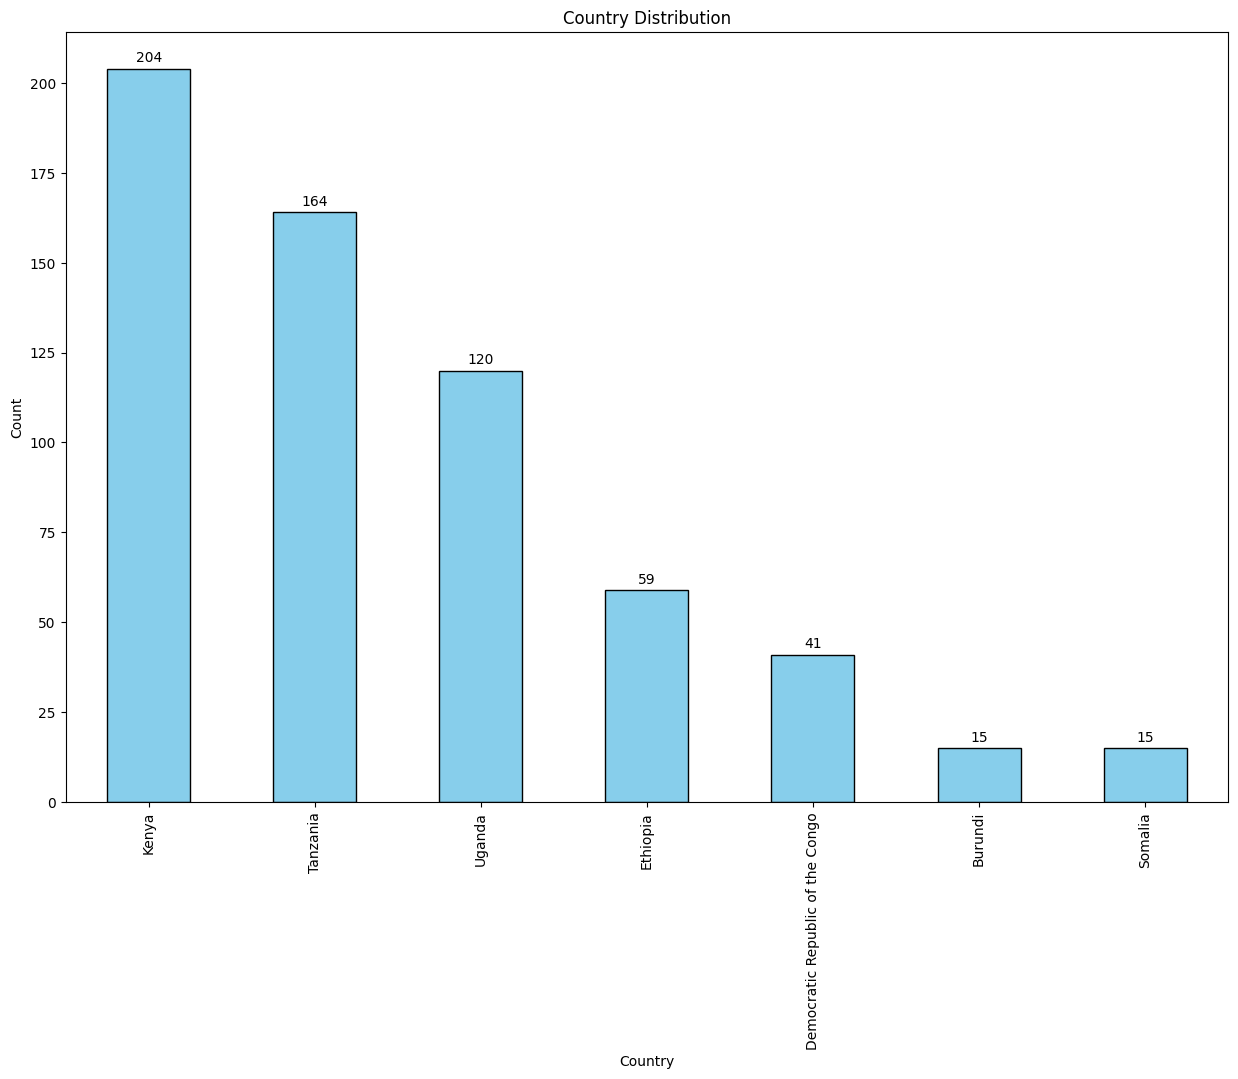

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
country_counts = merged['Country'].value_counts()
country_counts.plot(ax=ax, kind='bar', color='skyblue', edgecolor='black')

for i, v in enumerate(country_counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

ax.set_title('Country Distribution')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

plt.show()

## Age Distribution

In [20]:
age_distribution = df['Age'].value_counts().sort_index()
print("\nAge Distribution:\n", age_distribution)


Age Distribution:
 Age
18-24       149
25-34       267
35-44       110
45-54        62
Under 18     30
Name: count, dtype: int64


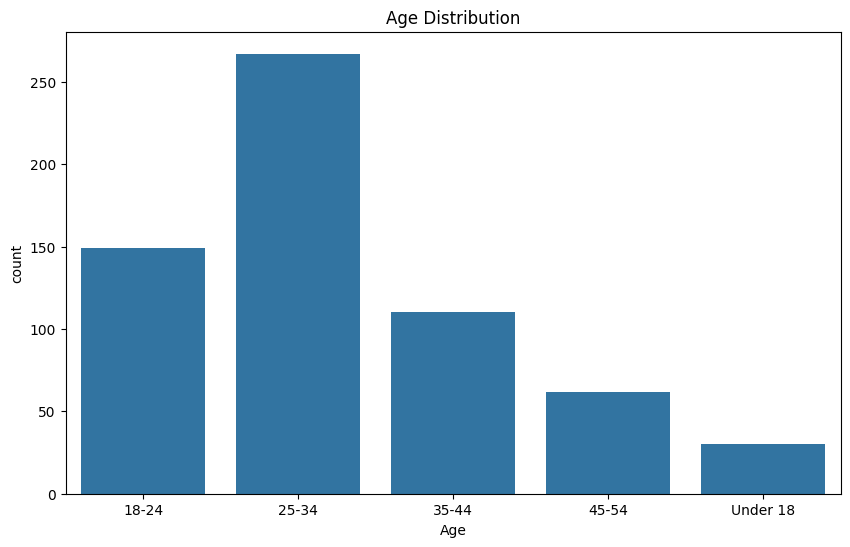

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df)
plt.title('Age Distribution')
plt.show()

## Smartphone and Internet Access

In [22]:
smartphone_access = df['Technology Access'].value_counts()
print("\nSmartphone Access:\n", smartphone_access)


Smartphone Access:
 Technology Access
Yes    428
No     190
Name: count, dtype: int64


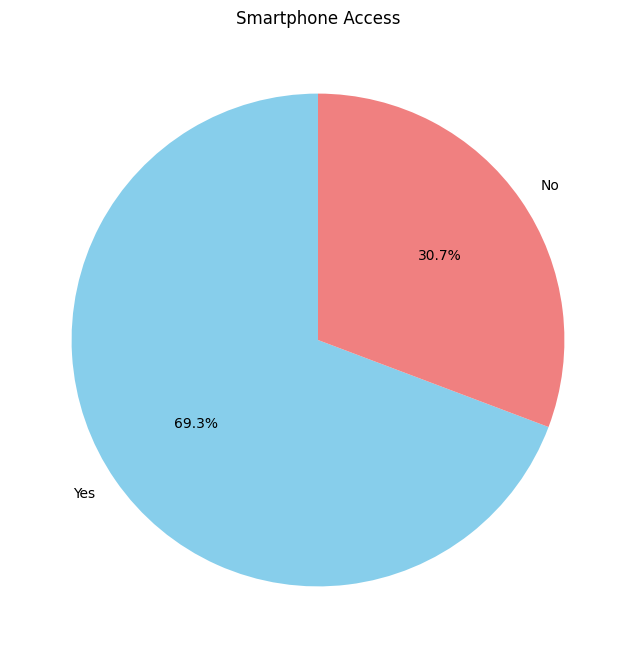

In [23]:
plt.figure(figsize=(8, 8))
smartphone_access = df['Technology Access'].value_counts()
labels = smartphone_access.index
plt.pie(smartphone_access, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Smartphone Access')
plt.show()

## Reliability of Access to Internet and Electricity 

In [24]:
reliability_distribution = df[['Technology Reliability']].apply(lambda x: x.value_counts())
print("\nReliability Distribution:\n", reliability_distribution)


Reliability Distribution:
                                  Technology Reliability
Technology Reliability                                 
Very Reliable                                       256
Somewhat Reliable                                   191
Neither Reliable nor Unreliable                      91
Somewhat Unreliable                                  58
Very Unreliable                                      22


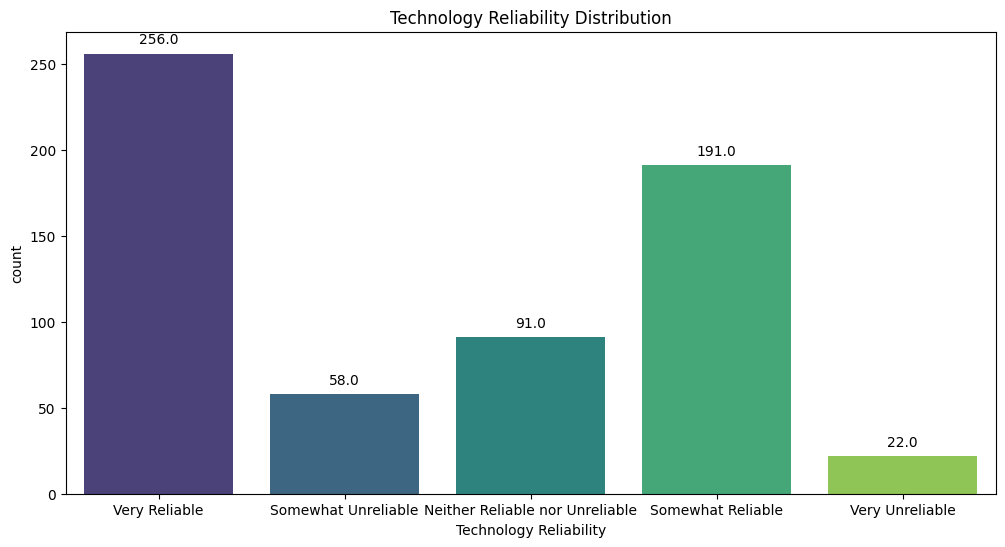

In [25]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Technology Reliability', data=df, hue='Technology Reliability', palette='viridis', dodge=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Technology Reliability Distribution')
plt.show()

## Usage of Digital Tools or Applications

In [26]:
popular_digital_tools = df['Use of Technology'].value_counts()
print("\nDigital Tools Usage:\n", popular_digital_tools)


Digital Tools Usage:
 Use of Technology
Regularly          262
Frequently         180
Always             127
Occasionally        33
Rarely or Never     16
Name: count, dtype: int64


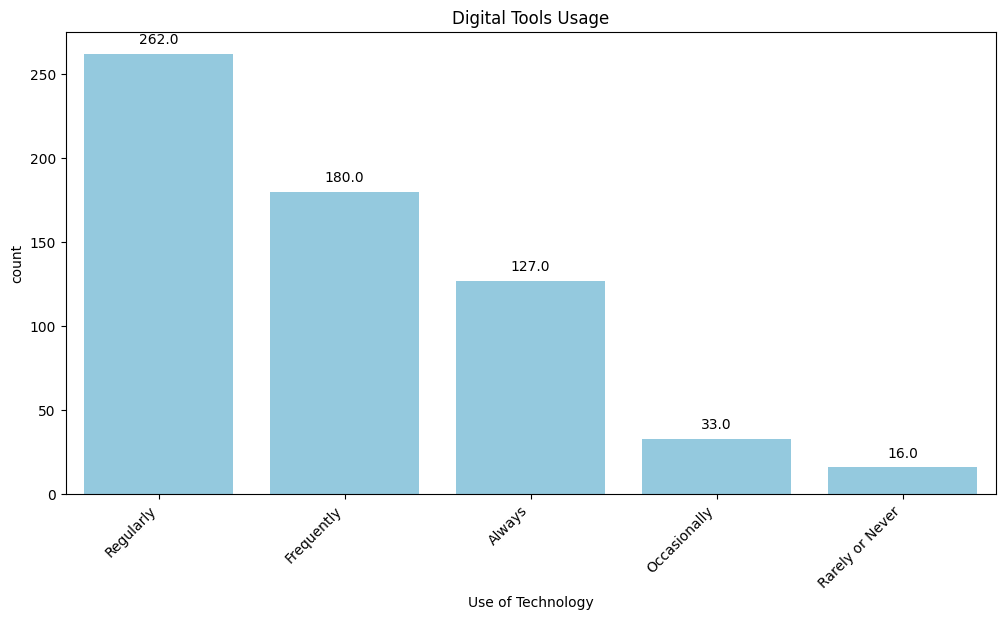

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Use of Technology', data=df, order=df['Use of Technology'].value_counts().index, color='skyblue')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Digital Tools Usage')
plt.xticks(rotation=45, ha='right')
plt.show()

## Popular Digital Tools or Applications 

In [28]:
popular_digital_tools = df['Technology Used Type'].value_counts()
print("\nPopular Digital Tools:\n", popular_digital_tools)


Popular Digital Tools:
 Technology Used Type
Email Applications                        167
Online Banking or Finance Applications    121
Productivity Tools                        113
Educational Platforms                      93
Health & Fitness Applications              73
Entertainment Streaming Services           51
Name: count, dtype: int64


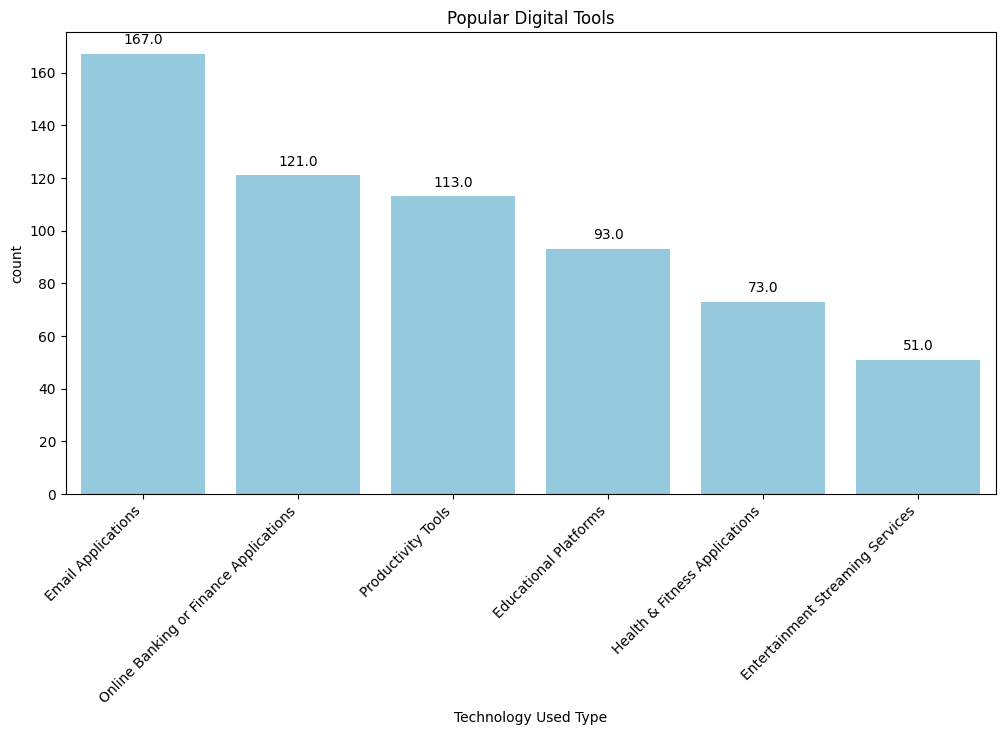

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Technology Used Type', data=df, order=df['Technology Used Type'].value_counts().index, color='skyblue')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Popular Digital Tools')
plt.xticks(rotation=45, ha='right')
plt.show()


## Technology Adoption

In [30]:
tech_adoption = df['Technology Adoption'].value_counts()
print("\nTechnology Adoption:\n", tech_adoption)


Technology Adoption:
 Technology Adoption
High         233
Very High    154
Moderate     106
Low           87
Very Low      38
Name: count, dtype: int64


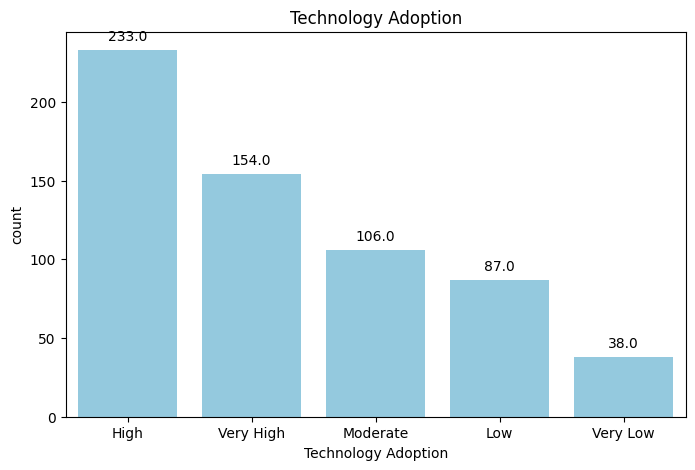

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Technology Adoption', data=df, order=df['Technology Adoption'].value_counts().index, color='skyblue')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Technology Adoption')
plt.show()

## Factors Impacting Technology Adoption

In [32]:
impact_adoption = df['Impacting Technology Adoption'].value_counts()
print("\nImpacting Technology Adoption:\n", impact_adoption)


Impacting Technology Adoption:
 Impacting Technology Adoption
Lack of awareness             217
Affordability                 166
Accessibility                 135
Cultural or Social Factors    100
Name: count, dtype: int64


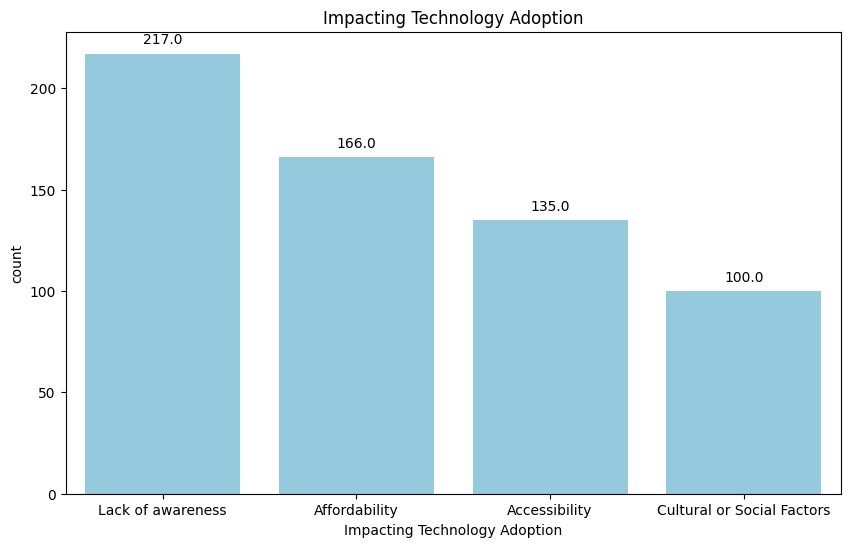

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Impacting Technology Adoption', data=df, order=df['Impacting Technology Adoption'].value_counts().index, color='skyblue')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Impacting Technology Adoption')
plt.show()

## Agriculture Technology Familiarity

In [34]:
agritech_familiarity = df['Technology Familiar With'].value_counts()
print("\nAgriTech Familiarity:\n", agritech_familiarity)


AgriTech Familiarity:
 Technology Familiar With
Machine Learning in Agriculture    154
Smart Irrigation Systems           130
Precision Farming                   93
Agricultural Robotics               75
Hydroponics                         63
Data Science Technologies           51
GPS-Guided Tractors                 31
None of the above                   21
Name: count, dtype: int64


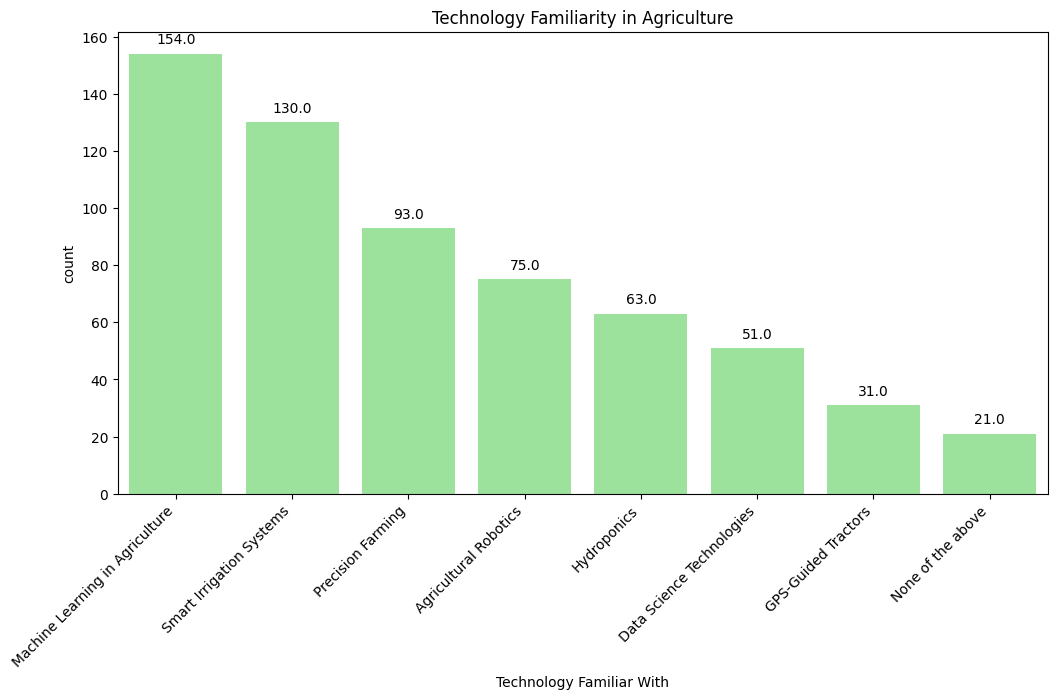

In [35]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Technology Familiar With', data=df, order=df['Technology Familiar With'].value_counts().index, color='lightgreen')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Technology Familiarity in Agriculture')
plt.xticks(rotation=45, ha='right')
plt.show()

## Agriculture Technology Benefit 

In [36]:
tech_benefit_distribution = df['Technology Benefit'].value_counts()
print("\nAgriculture Technology Benefit Distribution:\n", tech_benefit_distribution)


Agriculture Technology Benefit Distribution:
 Technology Benefit
Significantly    316
Moderately       184
Marginally       118
Name: count, dtype: int64


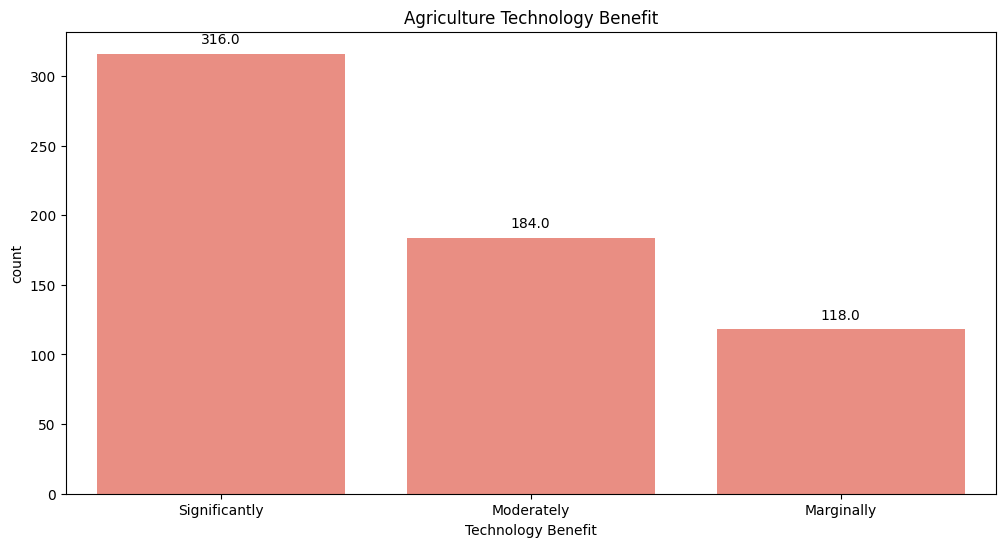

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Technology Benefit', data=df, order=df['Technology Benefit'].value_counts().index, color='salmon')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Agriculture Technology Benefit')
plt.show()